# Técnicas Avançadas de **Captura e Tratamento** de Dados

## Prof. Bernardo Alves Furtado

### MBA em Big Data, Business Analytics e Gestão de Negócios. @**IDP**

3 a 21 agosto  -- 21 horas/aula

---

# Conteúdo (preliminar)
1. Introdução. Armadilhas. Aperitivo. Exercícios. Dados estruturados e não-estruturados.
2. Formatos: tabulares, hierárquicos. Captura. Web. Api. Twitter. Exercícios.
3. Persistência. TXT, JSON, pickle, SQL. Captura internet e XML. Exercícios
4. Captura massiva. Exercícios DOU.
5. Tratamento. Texto. Filtrando texto. NOÇÕES de REGEX. Regular expressions. `import re`
6. Tratamento. Pandas. Pandas. Exercícios. Checagem básica. Missing data. Outliers.
7. Captura, tratamento, análise e resultado. Exercício.

---

In [65]:
print('...')

...


#  Apresentação

Bernardo Alves Furtado

1. Ipea. CNPq.
2. PhD. Geociências. Economica -- Utrecht. Cedeplar
3. Mestrado em 'Tratamento da Informação Espacial'. Regional Science
4. Spatial Analyst
5. Modeleiro... Python. Agent-based models

[CV Bernardo Alves Furtado](https://sites.google.com/view/bernardo-alves-furtado)

[ResearchGate. Produção acadêmica completa](https://www.researchgate.net/profile/Bernardo-Furtado-2)

[Plano Ensino. Bibliografia. Aulas. Código. Disponíveis GitHub](https://github.com/BAFurtado/MBA_IDP_CapturaTratamento)

**github.com/BAFurtado/MBA_IDP_CapturaTratamento**

@furtadobb

---

In [66]:
print('...')

...


# Armadilhas

### Source: @lmonasterio -- Coordenador Dados ENAP. Ipea e comentários

### Manchetes possíveis. Caso acreditássemos imediatamente nos dados...

1. "48 pessoas têm o CPF 111.111.111-11: veja se você os conhece"

2. "SILV e SLIVA estão entre os sobrenomes mais comuns no Brasil"

---

1. Qual erro está ocorrendo?

2. Como seria possível identificar esse erro?

In [67]:
print('...')

...


3. "Descubra o nome da menina de 8 anos que já tem carteira de trabalho."

4. “Turma de 1900 dá as caras” Subtítulo: “Centenas de brasileiros nascidos na virada do século finalmente saem de casa para se vacinar. Conheça suas histórias: ”

E esses dois?
___

In [68]:
print('...')

...


5. “Escândalo em Minas Gerais! Empresas sem CNPJ conseguem obter licenciamento ambiental”

6. Conheça quem são os brasileiros que nasceram no dia 30 de fevereiro e nunca fizeram aniversário

7. Homem mais alto do mundo é brasileiro. Conheça João da Silv, 18 metros de altura.

8. Brasil já aplicou 120 variantes da Coronavac. Conheça a CornaVAC, CronaVAC, CrnVAC, CoronaButantan, entre outras.

9. "Brasil tem a pessoa vacinada mais idosa do mundo, com 221 anos de idade"

Recomendação: [SHIKIDA, C. D.; MONASTERIO, L.; NERY, P. F. Guia brasileiro de análise de dados: armadilhas & soluções. Brasília, DF: ENAP, 2021.](https://repositorio.enap.gov.br/bitstream/1/6039/1/Guia%20BR%20de%20Ana%CC%81lise%20de%20Dados.pdf)

In [69]:
print('...')

...


### Exemplos de erros

1. Erros de digitação (typos)
2. Erros de separação: ponto ou vírgula, para números, por exemplo.
3. Informação ausente (missing)
4. Datas. Datas. Datas.

In [70]:
print('...')

...


---
# Aperitivo I. Ilustração

In [71]:
# To use it on your drive folder... Needs folder changing.
# from google.colab import drive
# drive.mount('/content/drive')

In [72]:
import pandas as pd
exemplo1 = pd.read_csv('https://github.com/BAFurtado/MBA_IDP_CapturaTratamento/blob/main/data/exemplo1.csv?raw=true')

1. Talvez primeiro comando: ```describe```?

In [73]:
exemplo1.describe()

,altura
count,6.000000
mean,86.153333
std,92.841548
min,1.420000
25%,1.725000
50%,80.900000
75%,167.500000
max,182.000000


Será que a tabela só tem essa coluna?

In [74]:
exemplo1.columns

Index(['nome', 'dob', 'altura'], dtype='object')

In [75]:
exemplo1.head()

,nome,dob,altura
0,maria,16/10/2001,1.7
1,Maria,01/01/00,1.8
2,João,20/2/2023,182.0
3,Joao,01/09/81,170.0
4,João,9/14/82,160.0


Talvez, então, `info()`

In [76]:
exemplo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nome    6 non-null      object 
 1   dob     6 non-null      object 
 2   altura  6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


### Estratégias? Simples.

1. Dados textuais.

In [77]:
exemplo1.nome = exemplo1.nome.str.lower()
exemplo1

,nome,dob,altura
0,maria,16/10/2001,1.70
1,maria,01/01/00,1.80
2,joão,20/2/2023,182.00
3,joao,01/09/81,170.00
4,joão,9/14/82,160.00
5,joao,08/05/00,1.42


In [78]:
# Be careful. Check that's what you really want
exemplo1.nome = exemplo1.nome.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
exemplo1.nome = exemplo1.nome.str.lower()
exemplo1

,nome,dob,altura
0,maria,16/10/2001,1.70
1,maria,01/01/00,1.80
2,joao,20/2/2023,182.00
3,joao,01/09/81,170.00
4,joao,9/14/82,160.00
5,joao,08/05/00,1.42


**Pandas datetime** is your friend

In [79]:
exemplo1.dob = pd.to_datetime(exemplo1.dob)
exemplo1

,nome,dob,altura
0,maria,2001-10-16,1.70
1,maria,2000-01-01,1.80
2,joao,2023-02-20,182.00
3,joao,1981-01-09,170.00
4,joao,1982-09-14,160.00
5,joao,2000-08-05,1.42


In [80]:
exemplo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   nome    6 non-null      object        
 1   dob     6 non-null      datetime64[ns]
 2   altura  6 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 272.0+ bytes


**Sobraram ainda <span style="color:blue">DUAS ARMADILHAS</span> nas datas! Quem identifica?**

---

## E para a altura?

In [81]:
#  pandas.DataFrame.loc[condition, column_label] = new_value
exemplo1.loc[exemplo1['altura'] > 3, 'altura'] = exemplo1.altura / 100
exemplo1

,nome,dob,altura
0,maria,2001-10-16,1.70
1,maria,2000-01-01,1.80
2,joao,2023-02-20,1.82
3,joao,1981-01-09,1.70
4,joao,1982-09-14,1.60
5,joao,2000-08-05,1.42


---
### <span style="color:red">Não recomendo</span> uso de apply, mas...

Realiza a operação linha por linha.

É custoso em tempo, pois não é vetorizado.

In [82]:
def correct_height(col):
    if col > 3:
        col /= 100
    return col

e2 = pd.read_csv('https://github.com/BAFurtado/MBA_IDP_CapturaTratamento/blob/main/data/exemplo1.csv?raw=true')
e2.altura = e2.altura.apply(correct_height)
e2

,nome,dob,altura
0,maria,16/10/2001,1.70
1,Maria,01/01/00,1.80
2,João,20/2/2023,1.82
3,Joao,01/09/81,1.70
4,João,9/14/82,1.60
5,Joao,08/05/00,1.42


---
### Captura 101. Acesso imediato

In [83]:
tabelas = pd.read_html('http://economia.uol.com.br')

**Não tivemos erro. Vamos investigar os achados**

In [84]:
type(tabelas)

list

In [85]:
len(tabelas)

6

In [86]:
type(tabelas[0])

pandas.core.frame.DataFrame

In [87]:
tabelas[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4 non-null      object
 1   1       4 non-null      object
 2   2       4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [88]:
for each in tabelas:
    print(each.head())

                0       1               2
0   Dólar Turismo  -0,75%        R$ 5,320
1           Libra  -1,02%        R$ 7,166
2  Peso Argentino  -0,92%        R$ 0,053
3         Bitcoin  -1,33%  R$ 204.116,219
       0       1
0    IBX   +0,8%
1  IBX50   +0,7%
2    IEE  +1,16%
3   INDX  +1,22%
          0       1          2
0  PETR4.SA  -1,86%   R$ 26,41
1  VALE3.SA  +0,67%  R$ 109,49
2  ITUB4.SA  +1,11%   R$ 30,62
3  BBDC4.SA  +0,49%   R$ 24,37
           0       1         2
0   HYPE3.SA   +4,1%  R$ 37,11
1  TAEE11.SA  +4,08%  R$ 39,55
2   TOTS3.SA  +3,85%  R$ 36,72
3   B3SA3.SA  +3,21%  R$ 15,74
4   WEGE3.SA  +3,12%  R$ 36,66
          0       1         2
0  CVCB3.SA  -1,88%  R$ 21,88
1  PETR4.SA  -1,78%  R$ 26,43
2  BBSE3.SA  -1,68%  R$ 21,01
3  ECOR3.SA  -1,65%  R$ 10,73
4  CSNA3.SA  -1,28%  R$ 44,90
          0       1         2
0  PETR4.SA  -1,78%  R$ 26,43
1  BBDC4.SA  +0,54%  R$ 24,38
2  ITSA4.SA  +1,88%  R$ 11,38
3  ITUB4.SA  +1,07%  R$ 30,61
4  VVAR3.SA  +1,11%  R$ 12,73


---
### Observações I

1. Usando `info()` percebemos que a informação não é numérica: 'object'
2. Notem que para o caso brasileiro, moeda está em real.

In [89]:
tabelas = pd.read_html('https://economia.uol.com.br', decimal=',', thousands='.')
moedas = tabelas[0]
moedas.columns = ['moeda', 'variacao', 'valor_reais']
print(moedas.head())

            moeda variacao     valor_reais
0   Dólar Turismo   -0,75%        R$ 5,320
1           Libra   -1,02%        R$ 7,166
2  Peso Argentino   -0,92%        R$ 0,053
3         Bitcoin   -1,33%  R$ 204.116,219


In [90]:
# source: https://pbpython.com/currency-cleanup.html
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return x.replace('R$', '').replace('.', '').replace(',', '.')
    return x

In [91]:
moedas.valor_reais = moedas.valor_reais.apply(clean_currency).astype(float)
print(moedas)
print(moedas.valor_reais.dtype)

            moeda variacao  valor_reais
0   Dólar Turismo   -0,75%        5.320
1           Libra   -1,02%        7.166
2  Peso Argentino   -0,92%        0.053
3         Bitcoin   -1,33%   204116.219
float64


---
### Observações II

1. O código `str.replace` só pode ser feito uma vez.
2. Note a ordem correta do `replace`!
2. Não é muito robusto, portanto.
3. Idealmente, é preferível ler a tabela já com as opções corretas:
```
sep=';'
decimal=','
thousands='.'
```

---
### Persistência -- caso básico

In [92]:
exemplo1.to_csv('tab_exemplo1_formatada.csv', sep=';', index=False)

---
### Observações III

1. Não há espaços ou acentos no nome, que é explicativo.
2. Formato CSV, com separador ponto-e-vírgula, é relativamente eficiente, acessível para humanos e ...
3. Abre direto no EXCEL brasileiro
4. Sempre eu utilizo `index=False` de modo que colunas de `index` não se acumulem ou abrir
e salvar o arquivo inúmeras vezes...

### Take-away

* **Mantemos o processo completo: da leitura do arquivo na fonte ao tratamento e salvamento**

* **Desse modo, diferentemente de alterações realizadas no EXCEL, por exemplo,
mantivemos a <span style="color:blue">REPRODUCIBILIDADE</span> da análise.
Agregando transparência ao processo.**

---
# Exercício. Básico.

1. Leia a tabela disponível em:

https://github.com/BAFurtado/MBA_IDP_CapturaTratamento/blob/main/data/exemplo2.csv

2. Não se esqueça de adicionar: `?raw=True` ao fim do endereço para importar diretamente a tabela e não a própria página
3. Não se esqueça de importar o `pandas` antes de tentar ler a tabela.
4. Verifique se os nomes das colunas contém espaços.
Ou altere o nome das colunas, ou utilize `tabela['nome da coluna']`.
Nesses casos, `tabela.nome da coluna` não vai funcionar...
5. Padronize os nomes, como feito para o exemplo1
6. Corrija os valores de impostos pagos.
7. Utilize a função `clean_currency()` utilizada acima.
Não se esqueça de aplicar imediatamente após o `apply` a porção `.astype(float)`
8. Utilize o `describe()` ou outro comando nos impostos corrigidos e identifique a média de impostos pagos.
9. Utilize `sum(coluna)` para o valor total de impostos pagos.
10. O que mais é possível notar de estranho neste exemplo simples?
Alguém está familiarizado com o comando `value_counts()` do pandas? Ele pode ajudar a identificar se há valores repetidos (uma de vários jeitos possíveis).


In [93]:
# Valores esperados.
v, tt = '41.364,28', '206.821,40'
print(f'Valor médio impostos pagos: {v}.')
print(f'Total: {tt}.')

Valor médio impostos pagos: 41.364,28.
Total: 206.821,40.


---
# Dados estruturados.

### Definição: *"Structured  data  is  data  that  depends  on  a  data  model  and  resides  in  a  fixed  field within a record.* (...)

### *"The  world  isn’t  made  up  of  structured  data,  though"* (CIELEN, MEYSMAN, 2016, p.4)

---
* Note. Nem dados do IBGE. Do censo, por vezes, são assim, assim, tão estruturados...

* https://twitter.com/furtadobb/status/1287762378550108161 (série de erros encontrados ao lidar com dados do Censo 2010)

    Oito erros distintos

* source resultado final: https://www.ipea.gov.br/portal/index.php?option=com_content&view=article&id=37073

---
# Não estruturados

* Depende do contexto
* Pode ser mutável, variável, condicional
* *Natural language*: ... tudo (twitter, notícias, e-mails, qualquer informação textual)

**Observação IV**

Ainda que seus dados sejam estruturados, há necessidade de se manter crítico em relação a eles. Sempre.

---
### Big Data. Data for Data Science.

Provavelmente serão estruturadas, *reliable*:

1. https://Data.gov The home of the US Government’s open data
2. https://data.europa.eu/en The home of the European Commission’s open data
3. https://Data.worldbank.org  Open data initiative from the World Bank
4. https://www.aiddata.org/datasets  Open data for international development
6. https://Open.fda.gov Open data from the US Food and Drug Administration

adapted from (CIELEN, MEYSMAN, 2016)

### Caso brasileiro.

1. https://ftp.ibge.gov.br/
2. https://basedosdados.org/
3. http://www2.datasus.gov.br/DATASUS/index.php
4. https://dados.gov.br/
5. https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

### Recentes.

1. 'https://queridodiario.ok.org.br/api/gazettes/': **Vamos investigar na seção de APIs**
2. https://www.gov.br/receitafederal/pt-br/assuntos/noticias/2021/junho/receita-federal-institui-o-cadastro-imobiliario-brasileiro-2013-cib

---
# Exemplo típico. Censo 2010. IBGE. `read_fwf` fixed-width-format

source: https://github.com/BAFurtado/censo2010/blob/master/read_amostra.py

### Automated
1. Download
2. Unzip
3. Identifica arquivo interesse
4. Identifica variável de interesse
5. Faz a expansão da amostra
6. Salva em arquivo Pandas (estruturado)

### Gerencia erros, omissões, sub-folders

In [94]:
# Na prática
path = r"ftp.ibge.gov.br"
folder = r'Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/'
file = 'AC.zip'

# Ilustração real dados com delimitação fixa
# Download e UNZIP

---
# via FTP

In [95]:
import ftplib
import os

['1_Atualizacoes_20160311.txt', 'AC.zip', 'AL.zip', 'AM.zip', 'AP.zip']


In [ ]:
ftp = ftplib.FTP(path)
ftp.login('anonymous', 'censo2010')
ftp.cwd(folder)
files = ftp.nlst()
print(files[:5])

In [ ]:
with open(os.path.join('data', file), 'wb') as f:
    ftp.retrbinary('RETR ' + file, f.write)

## Usando requests (só como exemplo, não adequado para FTP)

In [ ]:
filepath = r'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/AC.zip'

In [ ]:
import requests, zipfile, io
# verify = False, não vai ser mais permitido no Chrome, no futuro.
# vantagem, nesse caso, é que o arquivo ZIP já pode ser extraído imediatamente de `response`
response = requests.get(filepath, verify=False)
print(response.ok)

## Unzipping with python

In [ ]:
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall(r'data/')

## Unzipping quando foi usado o FTP

In [ ]:
file_interest = 'data/AC/Amostra_Domicilios_12.txt'
if not os.path.exists(file_interest):
    with zipfile.ZipFile(os.path.join('data', 'AC.zip'), 'r') as zip_ref:
        zip_ref.extractall('data')


![info](https://github.com/BAFurtado/MBA_IDP_CapturaTratamento/blob/main/data/documentacao_IBGE.png?raw=True)

## ARMADILHA GIGANTE

Para o python, a contagem começa em 0. Sempre. Portanto, a posição inicial do IBGE é reduzida de 1

## Faça o teste
![Códigos UFs](https://github.com/BAFurtado/MBA_IDP_CapturaTratamento/blob/main/data/assert.png?raw=True)

### Note a colspecs. A coluna inicial é 0 (e não 1, como indica a documentação).
### A segunda informação é a posição inicial, adicionada do seu tamanho INT + DEC, quando houver.

---
* v0220: Computador com internet
* 1: Sim
* 2: Não
* Branco (domicílios coletivos, sem computador...) Veja documentação.
---

In [99]:
# Nomes das colunas
cols = ['uf', 'codmun', 'peso', 'v0220']

# Converte pesos já na leitura
def convert_to_decimals(x):
    """ Auxiliary function for the text reading of weights on text files from IBGE
    """
    return float(x[:3] + '.' + x[3:])

# Aplica read_fwf
p = pd.read_fwf('data/AC/Amostra_Domicilios_12.txt',
                colspecs=[(0, 2), (2, 7), (28, 44), (100, 101)],
                header=None,
                names=cols,
                converters={'uf': str, 'codmun': str, 'peso': convert_to_decimals, 'v0220': str})

# Output
p.head()

,uf,codmun,peso,v0220
0,12,00013,4.679949,NaN
1,12,00013,4.285558,NaN
2,12,00013,4.324012,1
3,12,00013,4.903580,NaN
4,12,00013,5.732516,NaN


In [100]:
def check():
    try:
        assert sum(p['uf'] != '12') == 0
        assert all(p['uf'] == '12')
        print('All is good!')
    except AssertionError:
        print('Go back and check')

check()

All is good!


In [101]:
# Percentual de domicílios com computador e acesso a internet Acre 2010
p.groupby('v0220').agg({'peso': 'sum'})/p.peso.sum()

,peso
v0220,
1,0.189195
2,0.052181


---
# Aperitivo II
source: https://open.fda.gov/apis/

### API is an acronym for Application Programming Interface. <br>

### An **API call** is any request sent to the API.

### Requests are typically sent to the API in one of two ways:

1. Manually using a web browser
(such as navigating to the URL https://api.fda.gov/drug/label.json) or

2. **Programmatically** sending the request via executing code that **sends the API call** and processes the response. Continue reading this documentation for more details on how to compose an API call for openFDA specifically.

### The API **returns individual results as JSON** by default.

### The JSON object has two sections:

   1. `meta`: Metadata about the query, including a disclaimer, link to data license, last-updated date, and total matching records, if applicable.

   2. `results`: An **array** of matching results, dependent on which endpoint was **queried**.

---
# Apresentação alunos. Expectativas. Projetos. Interesses.


---
# $$+$$: Exercícios com pandas. Revisão.

### Dados do Titanic. Análise livre

1. Pergunta: Passageiros de classes inferiores apresentam taxa de sobrevivência menor?

source: https://www.kaggle.com/c/titanic/data

Observação: serve como introdução ao Kaggle, para os interessados.

### Dicionário

In [102]:
'''
Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex
Age 	Age in years
sibsp 	# of siblings / spouses aboard the Titanic
parch 	# of parents / children aboard the Titanic
ticket 	Ticket number
fare 	Passenger fare
cabin 	Cabin number
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
'''

'\nData Dictionary\nVariable\tDefinition\tKey\nsurvival \tSurvival \t0 = No, 1 = Yes\npclass \tTicket class \t1 = 1st, 2 = 2nd, 3 = 3rd\nsex \tSex\nAge \tAge in years\nsibsp \t# of siblings / spouses aboard the Titanic\nparch \t# of parents / children aboard the Titanic\nticket \tTicket number\nfare \tPassenger fare\ncabin \tCabin number\nembarked \tPort of Embarkation \tC = Cherbourg, Q = Queenstown, S = Southampton\nVariable Notes\n\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\n\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\n\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\n\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
# df = pd.read_csv("https://github.com/BAFurtado/MBA_IDP_CapturaTratamento/blob/main/data/titanic_test.csv?raw=True")
df.head()

# source: https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Aperitivo. Missing dados


In [104]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
df.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [107]:
df.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
F33            3
              ..
B82 B84        1
B69            1
A14            1
D21            1
B50            1
Name: Cabin, Length: 147, dtype: int64

In [108]:
df.Age.mode()

0    24.0
dtype: float64

In [109]:
df.Fare.mean()

32.2042079685746

In [4]:
values = {'Age': df.Age.mode()[0],
          'Cabin': 'SC',
          'Fare': df.Fare.mean()}

df.fillna(value=values, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Replace: male, female
sex = {'male': 0, 'female': 1}
df['sex_dummy'] = df.Sex.replace(sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_dummy
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SC,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,SC,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,SC,S,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  sex_dummy    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [19]:
cols = [1, 2, 5, 9, 12]
df_simples = df.iloc[:, cols]
df_simples.head()

,Survived,Pclass,Age,Fare,sex_dummy
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [20]:
corr = df_simples.corr()

<AxesSubplot:>

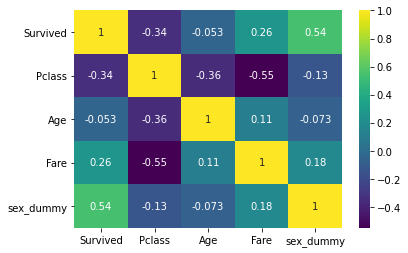

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot the heatmap
sns.heatmap(corr.iloc[:],
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap='viridis')

# Simple regression and output

/home/furtado/.conda/envs/py39web/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


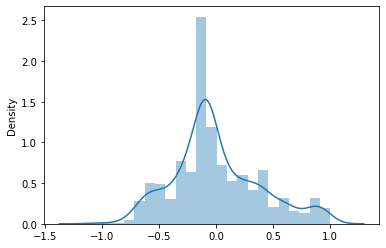

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     183.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           2.25e-92
Time:                        10:46:18   Log-Likelihood:                -407.28
No. Observations:                 891   AIC:                             822.6
Df Residuals:                     887   BIC:                             841.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7757      0.061     12.761      0.0

In [26]:
import statsmodels.formula.api as smf

def reg(y, data, colunas=''):
    """ Função que roda as regressões
        Entre com colunas e com base de dados """
    resultado = smf.ols(f"{y} ~  {colunas}", data=data).fit()
    sns.distplot(resultado.resid)
    plt.show()
    return resultado

res = reg('Survived', df_simples, 'Pclass + sex_dummy + Age')
print(res.summary())

---
## Nice output: com cara de paper

Outros resultados com boa apresentação, from Quantative Economics:

https://python.quantecon.org/ols.html


In [32]:
from statsmodels.iolib.summary2 import summary_col

def print_reg3(m1):
    info_dict={'Log-likelihood': lambda x: f"{x.llf:.2f}",
               'R-squared Adj': lambda x: f"{x.rsquared_adj:.2f}",
               'AIC': lambda x: f"{x.aic:.2f}",
               'BIC': lambda x: f"{x.bic:.2f}",
               'No. observations': lambda x: f"{int(x.nobs):d}"}

    results_table = summary_col(results=[m1],
                                float_format='%0.2f',
                                stars=True,
                                model_names=['Model 1'],
                                info_dict=info_dict)

    results_table.add_title('Table - OLS Regressions')
    print(results_table)

    with open('data/nice_output.txt', 'w') as f:
        f.write(results_table.as_text())
    # return results_table

print_reg3(res)

     Table - OLS Regressions
                 Model 1     m2   
----------------------------------
Intercept        0.78***  0.78*** 
                 (0.06)   (0.06)  
Pclass           -0.19*** -0.19***
                 (0.02)   (0.02)  
sex_dummy        0.50***  0.50*** 
                 (0.03)   (0.03)  
Age              -0.00*** -0.00***
                 (0.00)   (0.00)  
R-squared        0.38     0.38    
R-squared Adj.   0.38     0.38    
Log-likelihood   -407.28  -407.28 
R-squared Adj    0.38     0.38    
AIC              822.56   822.56  
BIC              841.73   841.73  
No. observations 891      891     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


---
# Exercício extra

0. Simples. Duas modificações apenas.
1. Modifique a função `print_reg3` para que imprima o resultado comparativo de três modelos.
2. Por exemplo, só com **Pclass**, adicionando **Age** e adicionando **sex_dummy**